<a href="https://colab.research.google.com/github/AtosLessio/lia1_2024_1/blob/main/Entregas%20-%20Atos%20L%C3%A9ssio/TensorFlow_Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Ponta a Ponta - Construindo um Modelo com Tensorflow - Cifar-10
Problema: construir um modelo de Inteligência Artificial capaz de classificar imagens, considerando 10 categorias, sendo: airplane; automobile; bird; cat; deer; dog; frog; horse; ship; truck.

Não há mágica. Há matemática! 🧙

**Fonte de dados**

O conjunto de dados CIFAR-10 consiste em 60.000 imagens coloridas (32x32) em 10 classes, com 6.000 imagens por classe. Existem 50.000 imagens de treinamento e 10.000 imagens de teste.

In [1]:
# Importando o necessário
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

**Carregando imagens de Treino e Teste**

In [2]:
# Carrega o dataset CIFAR-10 - Já está no Keras!
(imagens_treino, labels_treino), (imagens_teste, labels_teste) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [3]:
# Carrega o dataset CIFAR-10 - Já está no Keras!
(imagens_treino, labels_treino), (imagens_teste, labels_teste) = datasets.cifar10.load_data()

# Classes das imagens
nomes_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

**Pré-processamento**

Fazer pré-processamento nos dados, em nosso caso as imagens

In [4]:
# Normaliza os valores dos pixels para que os dados fiquem na mesma escala
imagens_treino = imagens_treino / 255.0
imagens_teste = imagens_teste / 255.0

In [5]:
# Função para exibir as imagens
def visualiza_imagens(images, labels):
    plt.figure(figsize = (10,10))
    for i in range(16):
        plt.subplot(4, 4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap = plt.cm.binary)
        plt.xlabel(nomes_classes[labels[i][0]])
    plt.show()

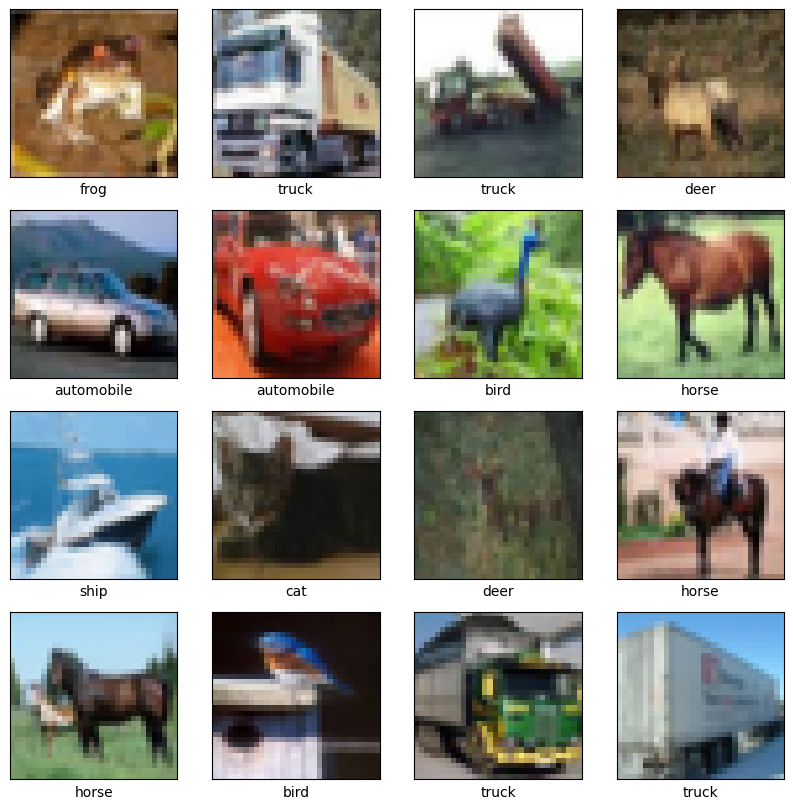

In [6]:
# Executa a função
visualiza_imagens(imagens_treino, labels_treino)

**Construindo a Rede Neural Convulacional**

O Keras é uma biblioteca do TensorFlow.

In [7]:
# Arquitetura do Modelo -> Feature Learning

# Cria o objeto de sequência de camadas - do Keras
modelo_lia = models.Sequential()

# Adiciona a primeira camada de convolução e max pooling (camada de entrada)
modelo_lia.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 3)))
modelo_lia.add(layers.MaxPooling2D((2, 2)))

# Adiciona a segunda camada de convolução e max pooling (camada intermediária)
modelo_lia.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
modelo_lia.add(layers.MaxPooling2D((2, 2)))

# Adiciona a terceira camada de convolução e max pooling (camada intermediária)
modelo_lia.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
modelo_lia.add(layers.MaxPooling2D((2, 2)))

In [8]:
# Adicionar camadas de classificação - Converte para um vetor - flatten
modelo_lia.add(layers.Flatten())
modelo_lia.add(layers.Dense(64, activation = 'relu'))
modelo_lia.add(layers.Dense(10, activation = 'softmax'))

In [9]:
# Compilação do modelo
modelo_lia.compile(optimizer = 'adam',
                   loss = 'sparse_categorical_crossentropy',
                   metrics = ['accuracy'])

# adam - é um algoritmo de aprendizagem tipo backpropagation!
# loss - função de erro. Isso se resume a uma otimização função matemática!
# metrics - medir o sucesso!

**Treinamento**

In [10]:
# Executando o treinamento
%%time
history = modelo_lia.fit(imagens_treino,
                         labels_treino,
                         epochs = 10,
                         validation_data = (imagens_teste, labels_teste))

Epoch 1/10
1563/1563 [==============================] - 14s 6ms/step - loss: 1.5691 - accuracy: 0.4264 - val_loss: 1.2944 - val_accuracy: 0.5407
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1911 - accuracy: 0.5759 - val_loss: 1.1320 - val_accuracy: 0.6018
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0429 - accuracy: 0.6323 - val_loss: 1.0420 - val_accuracy: 0.6313
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9477 - accuracy: 0.6702 - val_loss: 0.9733 - val_accuracy: 0.6558
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8771 - accuracy: 0.6940 - val_loss: 0.9421 - val_accuracy: 0.6738
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8193 - accuracy: 0.7134 - val_loss: 0.9850 - val_accuracy: 0.6621
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7737 - accuracy: 0.7283 - val_loss: 0.8910 - val_accuracy

Treinamento concluído com sucesso!

**Previsão - Testar o modelo (Deploy)**

Testar o modelo treinado com imagens que ele ainda não viu. Por fim, verificamos o resultado da previsão e emitimos a informação sobre a classe.


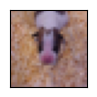

In [30]:
# Carrega uma nova imagem
nova_imagem = Image.open("/content/sample_data/images/9569.jpg")

# Redimensiona para 32x32 pixels
nova_imagem = nova_imagem.resize((32, 32))

# Exibir a imagem
plt.figure(figsize = (1,1))
plt.imshow(nova_imagem)
plt.xticks([])
plt.yticks([])
plt.show()

In [31]:
# Converte a imagem para um array NumPy e normaliza
nova_imagem_array = np.array(nova_imagem) / 255.0

In [32]:
# Expande a dimensão do array para que ele tenha o formato (1, 32, 32, 3)
nova_imagem_array = np.expand_dims(nova_imagem_array, axis = 0)

In [33]:
# Fazendo a previsão!
previsoes = modelo_lia.predict(nova_imagem_array)

1/1 [==============================] - 0s 17ms/step


In [34]:
print(previsoes)

[[3.8076873e-04 3.7823693e-06 1.4957747e-01 5.7409950e-02 9.4452798e-03
  7.7353930e-01 8.4732164e-04 8.7561663e-03 4.2739325e-06 3.5686400e-05]]


In [35]:
# Obtém a classe com maior probabilidade e o nome da classe
classe_prevista = np.argmax(previsoes)
nome_classe_prevista = nomes_classes[classe_prevista]


In [36]:
print("A nova imagem foi classificada como:", nome_classe_prevista)

A nova imagem foi classificada como: dog
